In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os

sns.set_theme(style="whitegrid", font_scale=1.5)
os.chdir("./baselines/")

## Analysis of baselines

In [15]:
def plot(df, reference_value, threshold, name):
    symptoms = df.copy()

    symptoms.sort_values(by=reference_value, ascending=False, inplace=True)
    symptoms = symptoms[(symptoms[reference_value].abs() > threshold)&(symptoms["importance"].abs() > 0.01)]
    symptoms.loc[:, "unbalance"] = abs(1 - symptoms["unbalance"])
    symptoms = symptoms.melt(
        id_vars=["variable"],
        value_vars=[
            "importance",
            "correlation",
            "unbalance",
            "statistical_parity",
            "equalized_odds",
            "average_odds",
        ],
        var_name="symptom",
    )
    symptoms["value"] = symptoms["value"].abs()
    sns.catplot(
        data=symptoms,
        y="variable",
        x="value",
        hue="symptom",
        kind="bar",
        height=15,
        aspect=1,
    )

    plt.axvline(x=threshold, color="red")
    plt.title(name)
    plt.xlabel("Metrics")
    plt.ylabel("Variable")
    plt.show()


def ratio(df):
    baseline = df[df["statistical_parity"].abs() > 0.2]
    proposal = df[(df["unbalance"] > 0.2) & (df["correlation"] > 0.1)]
    return proposal.shape[0] / baseline.shape[0]

### Adult

### Positive label = 0

In [11]:
adult_0 = pd.read_csv("adult/symptoms_0.csv", index_col=0)

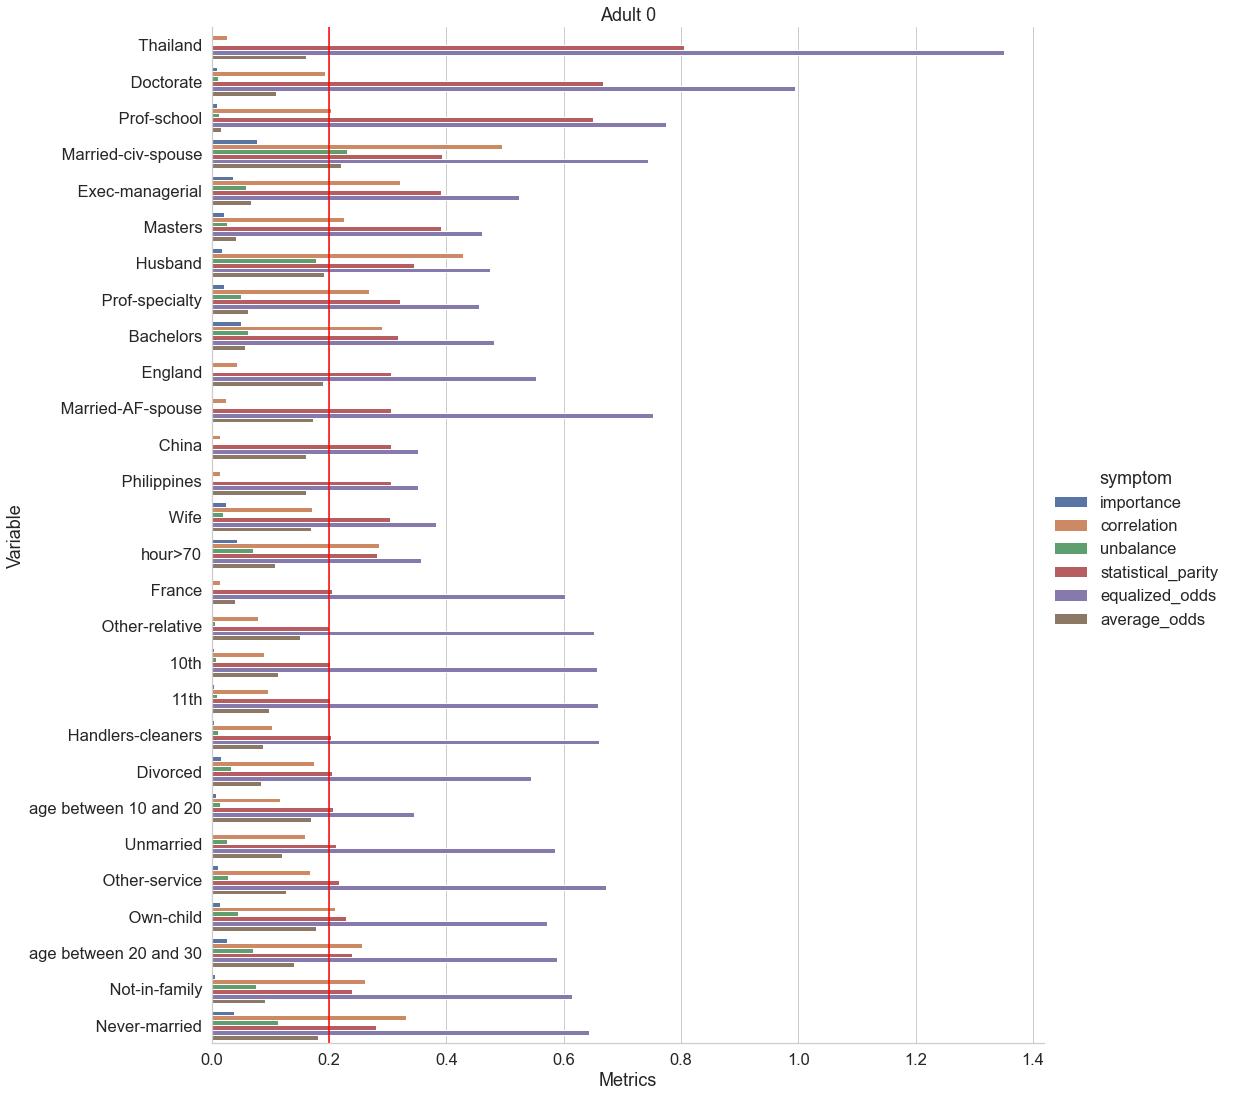

In [12]:
plot(adult_0, "statistical_parity", 0.2, "Adult 0")

### Positive label = 1

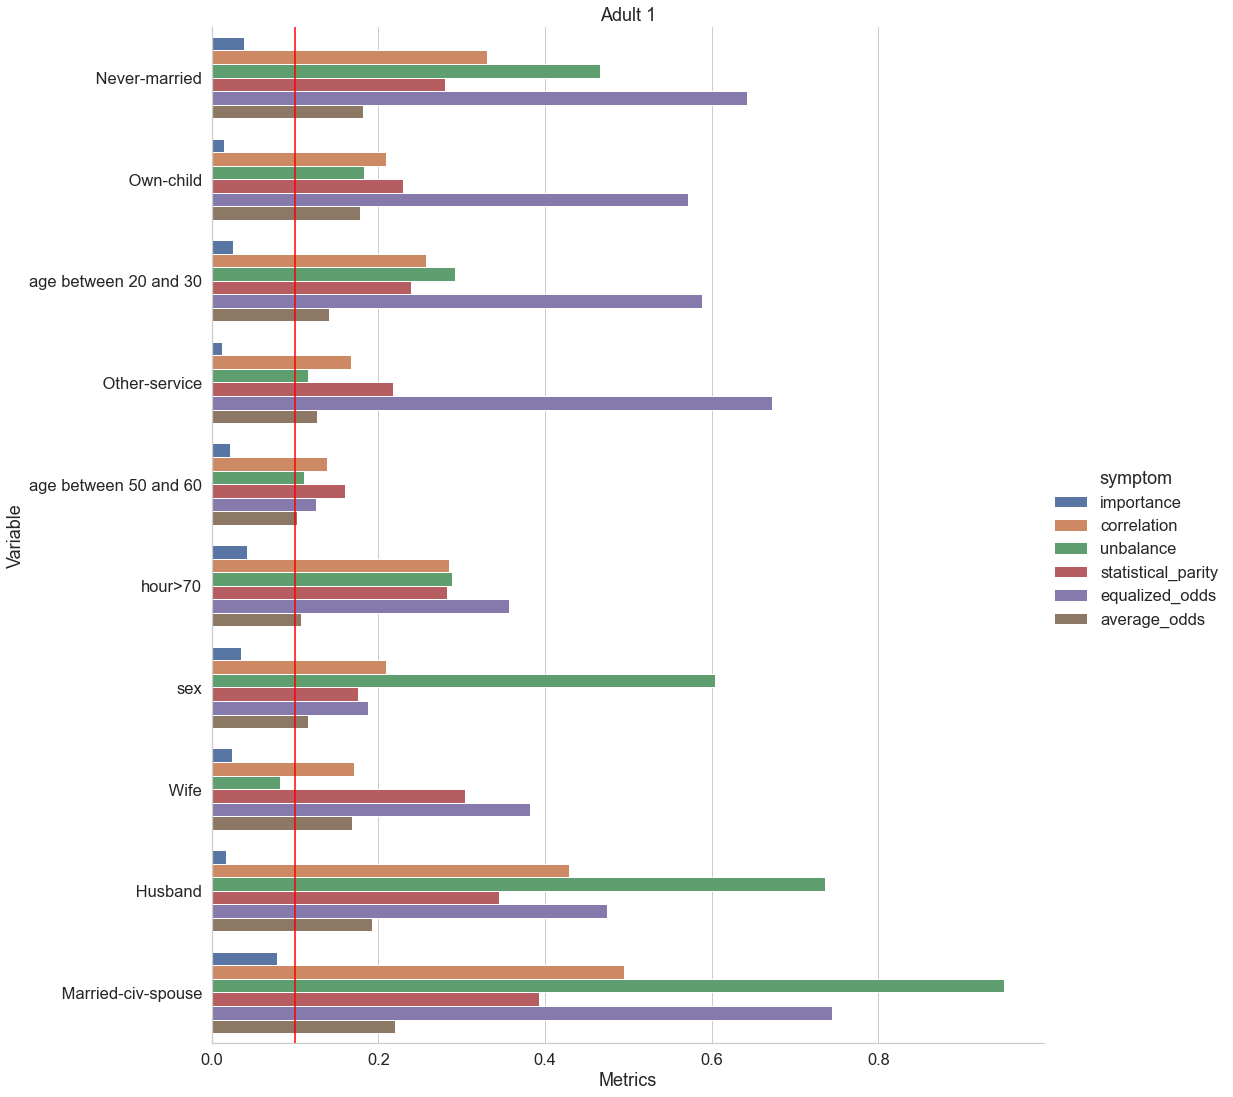

In [16]:
adult_1 = pd.read_csv("adult/symptoms_1.csv", index_col=0)
plot(adult_1, "average_odds", 0.1, "Adult 1")

## CMC

### Positive label = 1

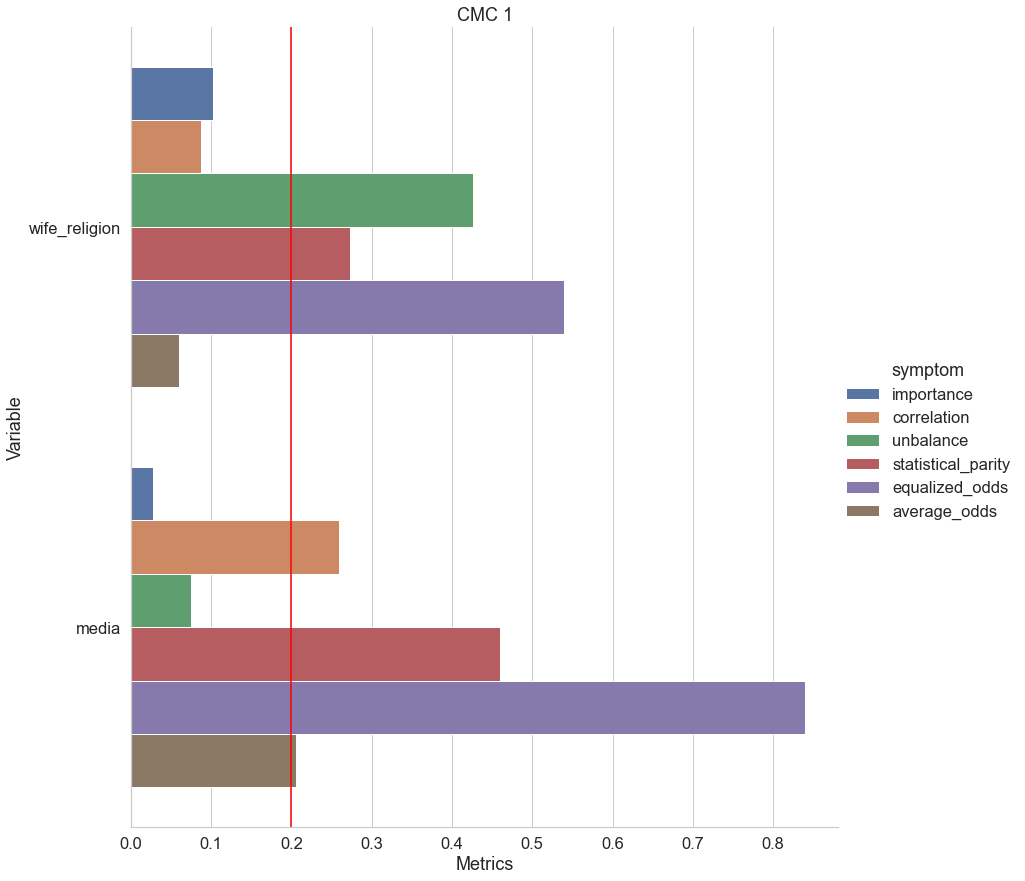

In [7]:
cmc1 = pd.read_csv("cmc_proc/symptoms_1.csv", index_col=0)
plot(cmc1, "statistical_parity", 0.2, "CMC 1")

In [26]:
baseline = cmc1[cmc1['statistical_parity'].abs() > 0.2]
unbalanced = cmc1[cmc1['unbalance'].abs() > 0.2]

In [27]:
unbalanced.shape[0]

3

In [28]:
unbalanced.shape[0] / baseline.shape[0] 

1.5

### Positive label = 2

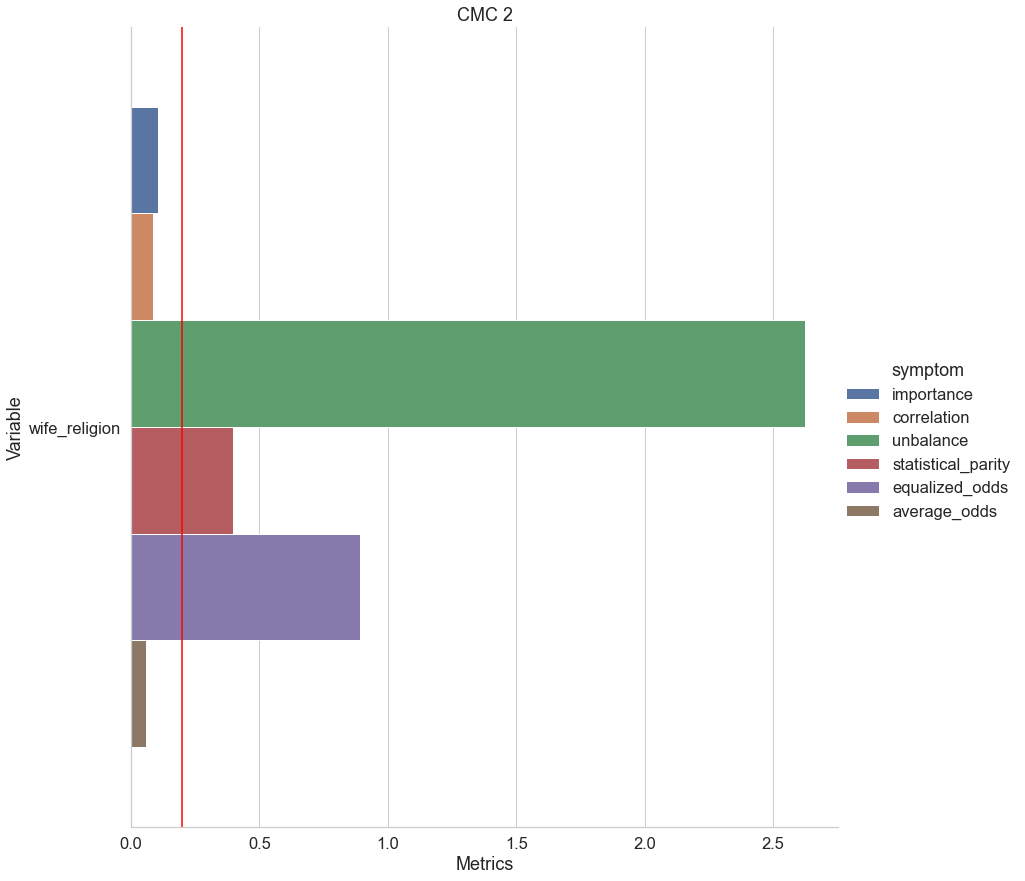

In [8]:
cmc2 = pd.read_csv("cmc_proc/symptoms_2.csv", index_col=0)
plot(cmc2, "statistical_parity", 0.2, "CMC 2")

### Positive label = 3

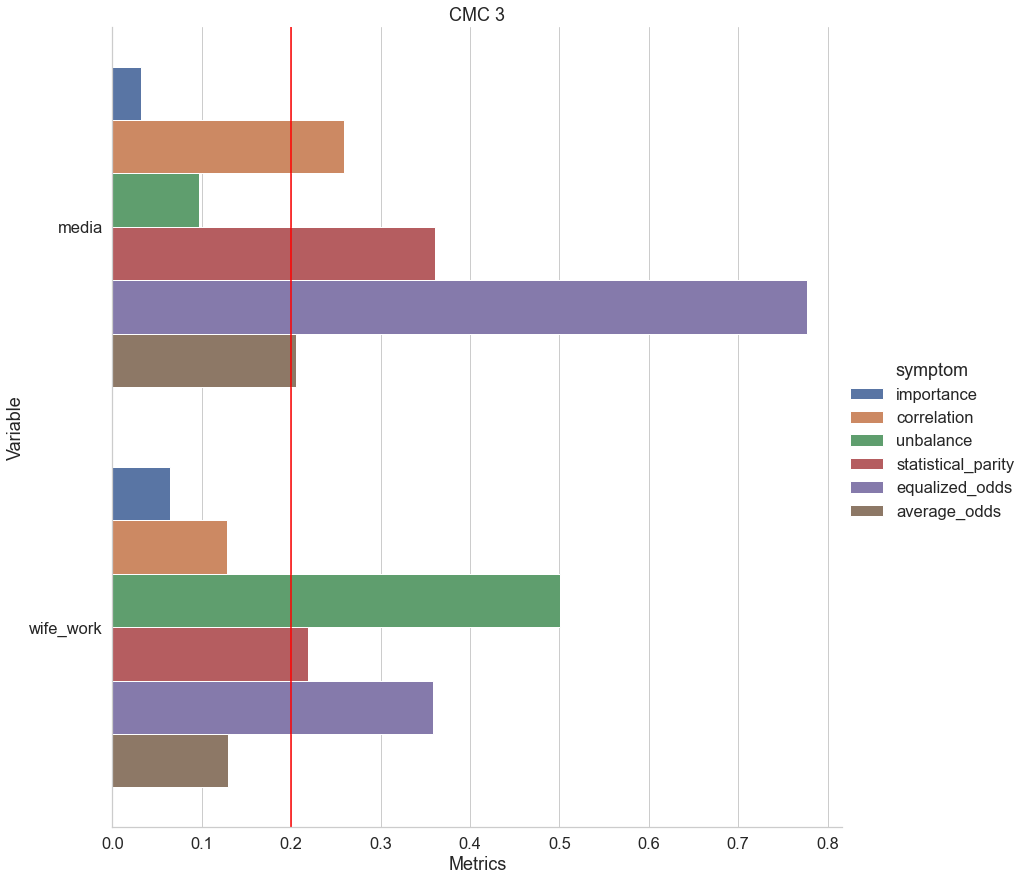

In [9]:
cmc3 = pd.read_csv("cmc_proc/symptoms_3.csv", index_col=0)
plot(cmc3, "statistical_parity", 0.2, "CMC 3")

## COMPAS

### Positive label = 0

In [17]:
compas0 = pd.read_csv("compas/symptoms_0.0.csv", index_col=0)

baseline = compas0[compas0["statistical_parity"].abs() > 0.2]

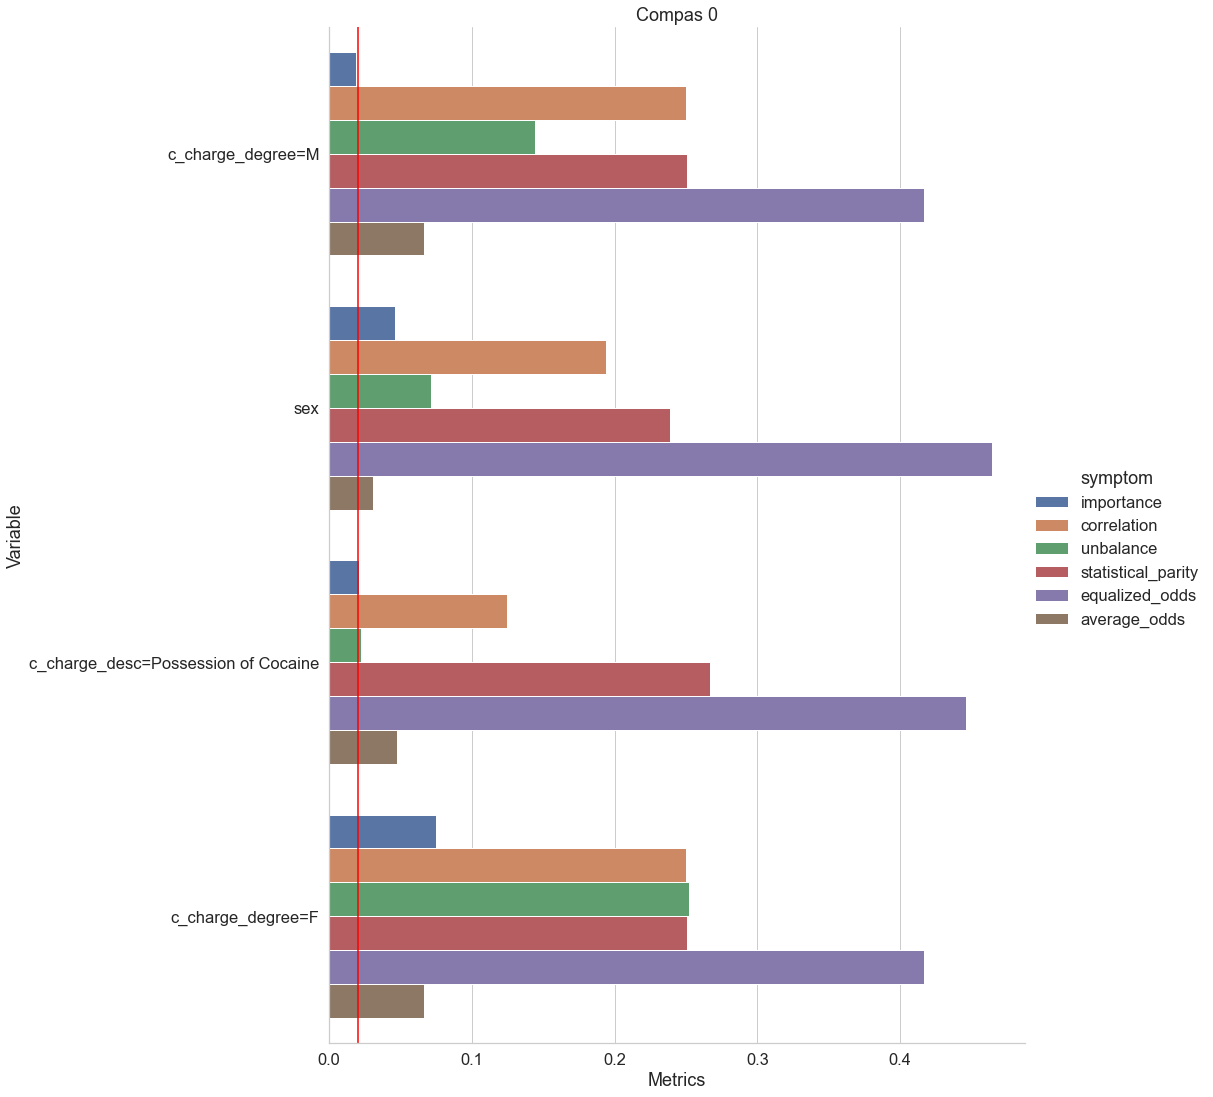

In [20]:
plot(compas0, "average_odds", 0.02, "Compas 0")

In [42]:
proposal = compas0[(compas0["unbalance"] > 0.2) & (compas0["correlation"] > 0.1)]

#### Percentage of unbalanced data over biased data

In [44]:
proposal.shape[0] / baseline.shape[0]

0.0375

### Positive label = 1

In [21]:
compas1 = pd.read_csv("compas/symptoms_1.0.csv", index_col=0)

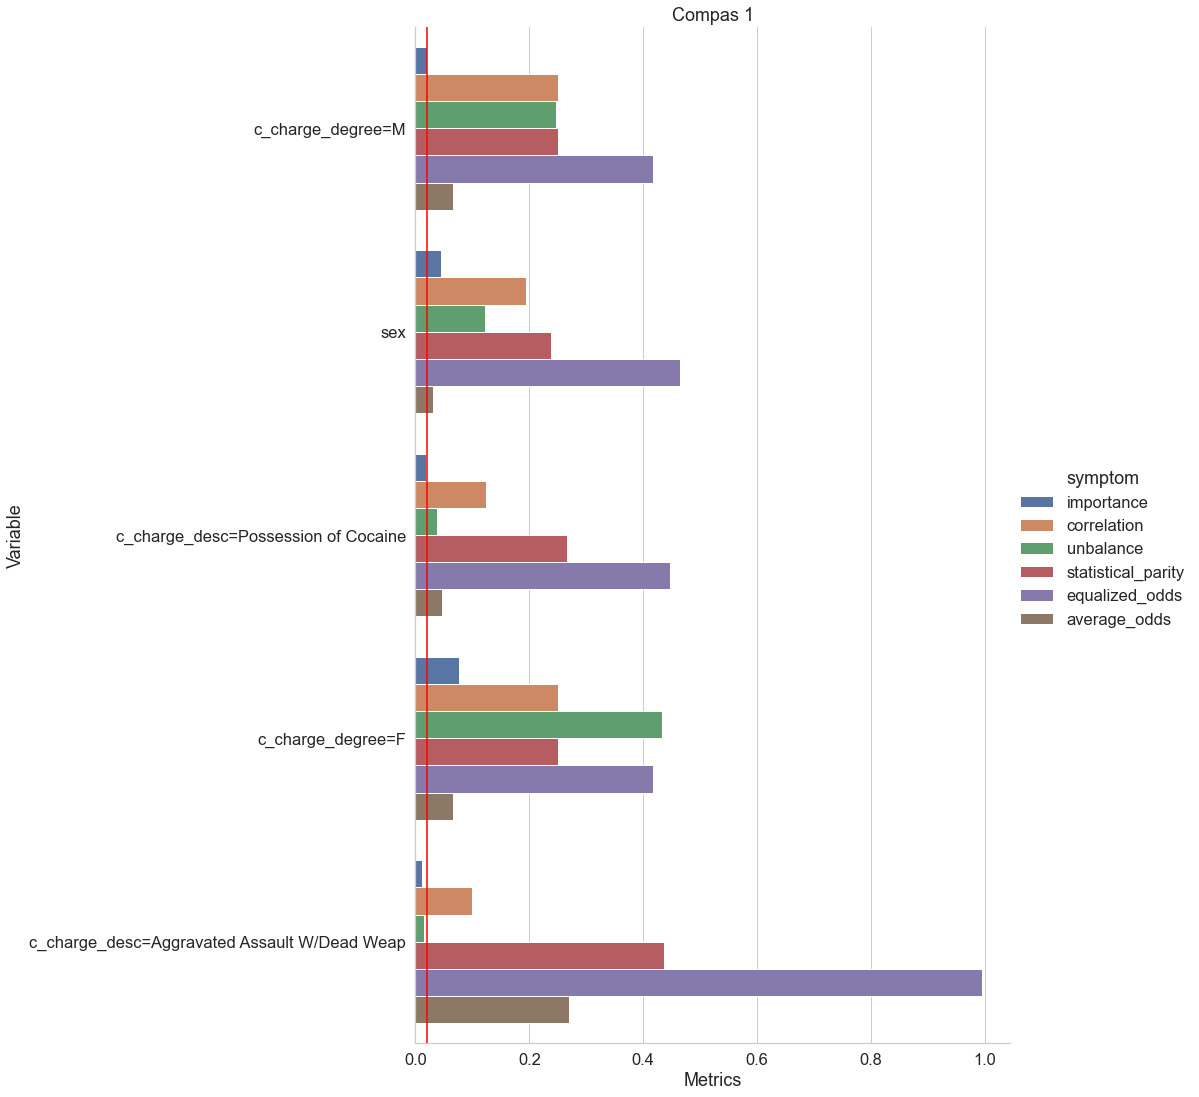

In [23]:
plot(compas1, "average_odds", 0.02, "Compas 1")

In [45]:
baseline = compas1[compas1["statistical_parity"].abs() > 0.2]
proposal = compas1[(compas1["unbalance"] > 0.2) & (compas1["correlation"] > 0.1)]

proposal.shape[0] / baseline.shape[0]

0.0375

## Crime

In [51]:
crime100 = pd.read_csv("crime_proc/symptoms_100.0.csv", index_col=0)
ratio(crime100)

1.0

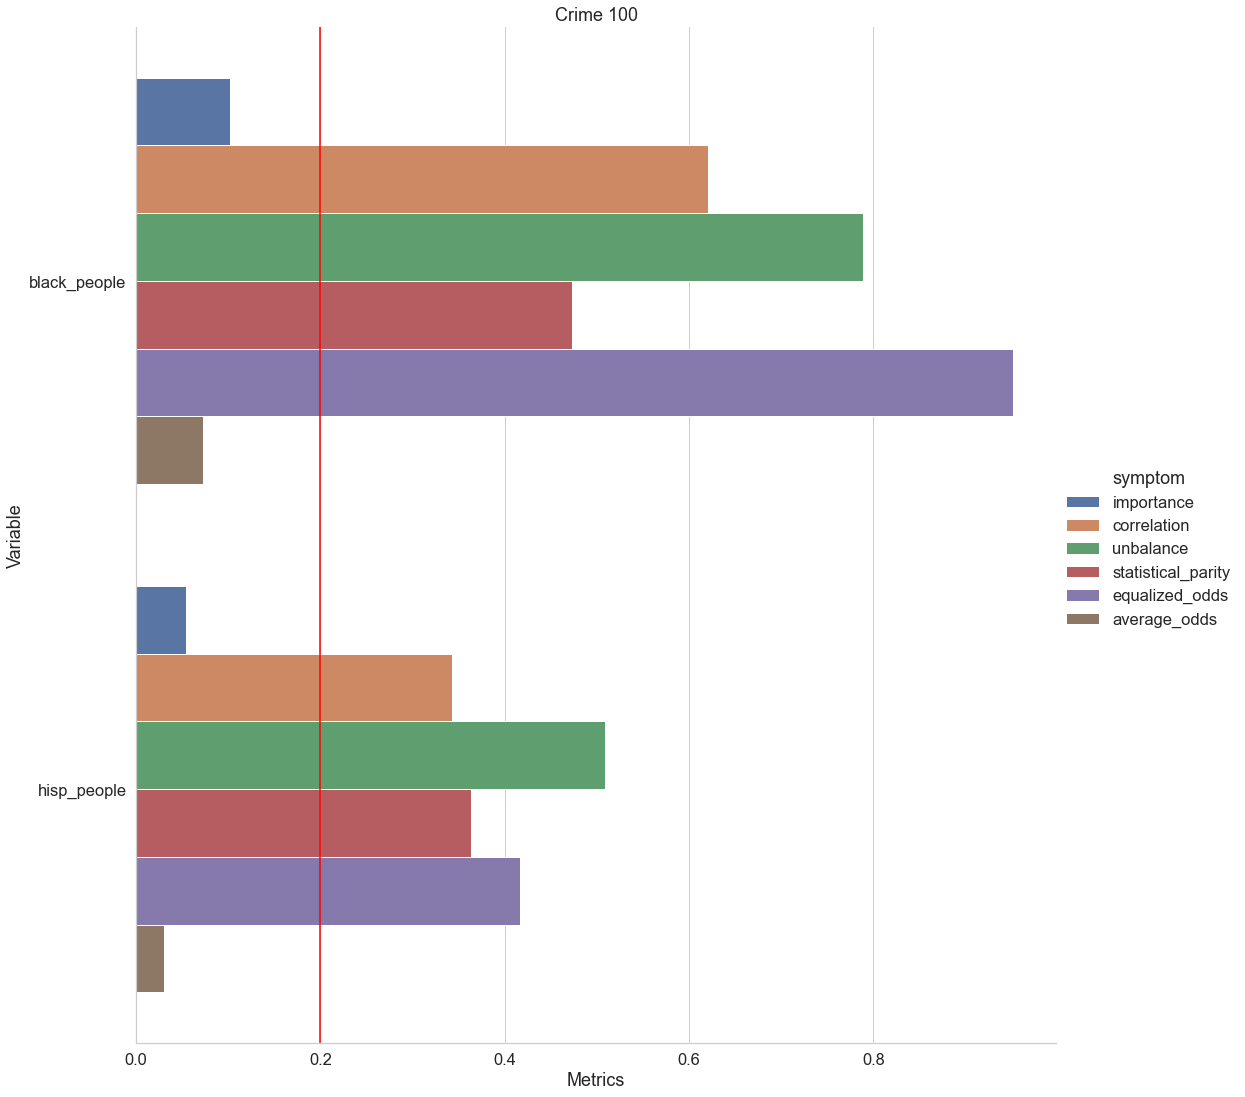

In [52]:
plot(crime100, "statistical_parity", 0.2, "Crime 100")